In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("="*80)
print("TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE")
print("Analyse risque portefeuille et calcul VaR")
print("="*80)

# ============================================================================ # DONNÉES
# ============================================================================

# Rendements mensuels historiques (%)
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

# Paramètres
capital = 500000 # € à investir
perte_max_toleree = 50000 # € (10% capital)
taux_sans_risque = 3.0 # % annuel

# ============================================================================ # QUESTION 1.1 — STATISTIQUES DESCRIPTIVES
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.1 — STATISTIQUES DESCRIPTIVES")
print("="*80)

def calculer_stats_portefeuille(rendements, nom):
    """
    Calcule statistiques descriptives portefeuille

    Parameters:

    rendements : np.array Rendements mensuels (%)
    nom : str
    Nom portefeuille
    Returns:
    dict : Statistiques calculées
    """
    # a) Moyenne mensuelle
    moyenne_mensuelle = np.mean(rendements)

    # b) Écart-type mensuel
    ecart_type_mensuel = np.std(rendements, ddof=1) # ddof=1 pour échantillon

    # c) Médiane
    mediane = np.median(rendements)

    # d) Rendement annualisé (capitalisation composée)
    # Formule : (1 + r_mensuel/100)^12 - 1
    rendement_annuel = ((1 + moyenne_mensuelle/100)**12 - 1) * 100

    # e) Volatilité annualisée
    # Formule : σ_annuel = σ_mensuel × √12
    volatilite_annuelle = ecart_type_mensuel * np.sqrt(12)

    portfolio_stats_dict = {
        'nom': nom,
        'moyenne_mensuelle': moyenne_mensuelle,
        'ecart_type_mensuel': ecart_type_mensuel,
        'mediane': mediane,
        'rendement_annuel': rendement_annuel,
        'volatilite_annuelle': volatilite_annuelle
    }

    return portfolio_stats_dict

# Calcul stats pour les deux portefeuilles
stats_A = calculer_stats_portefeuille(rendements_A, "CONSERVATIVE (A)")
stats_B = calculer_stats_portefeuille(rendements_B, "AGRESSIF (B)")

# Affichage résultats
for portfolio_stats in [stats_A, stats_B]:
    print(f"\n📊 PORTEFEUILLE {portfolio_stats['nom']}")
    print(f"\t• Rendement mensuel moyen : {portfolio_stats['moyenne_mensuelle']:.2f}%")
    print(f"\t• Écart-type mensuel : {portfolio_stats['ecart_type_mensuel']:.2f}%")
    print(f"\t• Médiane : {portfolio_stats['mediane']:.2f}%")
    print(f"\t• Rendement annualisé : {portfolio_stats['rendement_annuel']:.2f}%")
    print(f"\t• Volatilité annualisée : {portfolio_stats['volatilite_annuelle']:.2f}%")

TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE
Analyse risque portefeuille et calcul VaR

QUESTION 1.1 — STATISTIQUES DESCRIPTIVES

📊 PORTEFEUILLE CONSERVATIVE (A)
	• Rendement mensuel moyen : 0.94%
	• Écart-type mensuel : 0.48%
	• Médiane : 1.00%
	• Rendement annualisé : 11.85%
	• Volatilité annualisée : 1.65%

📊 PORTEFEUILLE AGRESSIF (B)
	• Rendement mensuel moyen : 2.89%
	• Écart-type mensuel : 4.45%
	• Médiane : 4.70%
	• Rendement annualisé : 40.79%
	• Volatilité annualisée : 15.41%



QUESTION 1.2 — VISUALISATION DISTRIBUTIONS


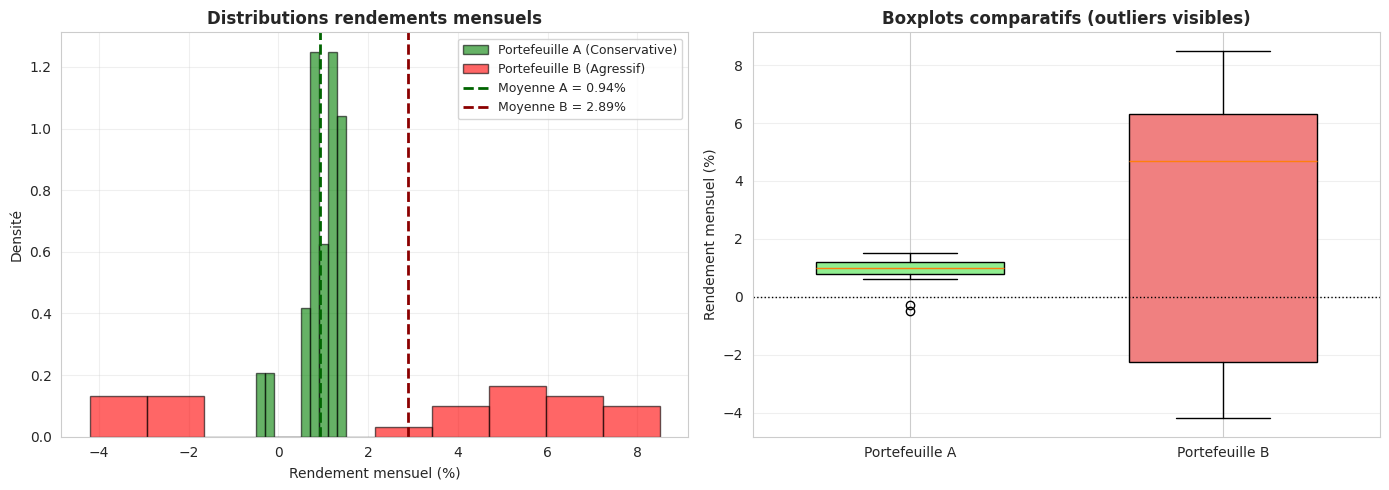

✓ Graphiques générés (histogrammes + boxplots)


In [8]:
# QUESTION 1.2 — VISUALISATION DISTRIBUTIONS
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.2 — VISUALISATION DISTRIBUTIONS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1 : Histogrammes superposés
ax1 = axes[0]
ax1.hist(rendements_A, bins=10, alpha=0.6, color='green', edgecolor='black', label='Portefeuille A (Conservative)', density=True)
ax1.hist(rendements_B, bins=10, alpha=0.6, color='red', edgecolor='black', label='Portefeuille B (Agressif)', density=True)

# Lignes moyennes
ax1.axvline(stats_A['moyenne_mensuelle'], color='darkgreen', linestyle='--', linewidth=2, label=f'Moyenne A = {stats_A["moyenne_mensuelle"]:.2f}%')
ax1.axvline(stats_B['moyenne_mensuelle'], color='darkred', linestyle='--', linewidth=2, label=f'Moyenne B = {stats_B["moyenne_mensuelle"]:.2f}%')

ax1.set_title('Distributions rendements mensuels', fontsize=12, fontweight='bold')
ax1.set_xlabel('Rendement mensuel (%)')
ax1.set_ylabel('Densité')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2 : Boxplots comparatifs
ax2 = axes[1]
data_boxplot = [rendements_A, rendements_B]
bp = ax2.boxplot(data_boxplot, tick_labels=['Portefeuille A', 'Portefeuille B'], patch_artist=True, widths=0.6)

# Couleurs boxplots
colors = ['lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_title('Boxplots comparatifs (outliers visibles)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Rendement mensuel (%)')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(0, color='black', linestyle=':', linewidth=1)

plt.tight_layout()
plt.show()
print("✓ Graphiques générés (histogrammes + boxplots)")

In [20]:
# QUESTION 1.3 — VALUE AT RISK (VaR 95%)
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.3 — VALUE AT RISK (VaR 95%)")
print("="*80)

def calculer_var_portefeuille(stats_dict, capital, alpha=0.05):
    """
    Calcule VaR paramétrique mensuelle et annuelle

    Parameters:
    stats_dict : dict
        Statistiques portefeuille (from calculer_stats_portefeuille)
    capital : float
        Capital investi (€)
    alpha : float
        Niveau risque (0.05 pour VaR 95%)

    Returns:
    dict : VaR calculées
    """
    # Quantile normal standard pour alpha=5% (queue gauche)
    z_alpha = stats.norm.ppf(alpha) # ≈ -1.645

    # a) VaR mensuelle (%)
    var_mensuelle_pct = stats_dict['moyenne_mensuelle'] + z_alpha * stats_dict['ecart_type_mensuel']

    # b) VaR annuelle (%)
    # Méthode : Utiliser rendement et volatilité annualisés
    var_annuelle_pct = stats_dict['rendement_annuel'] + z_alpha * stats_dict['volatilite_annuelle']

    # c) VaR en perte monétaire (€)
    var_mensuelle_euros = capital * (var_mensuelle_pct / 100)
    var_annuelle_euros = capital * (var_annuelle_pct / 100)

    var_results = {
        'var_mensuelle_pct': var_mensuelle_pct,
        'var_annuelle_pct': var_annuelle_pct,
        'var_mensuelle_euros': var_mensuelle_euros,
        'var_annuelle_euros': var_annuelle_euros
    }

    return var_results

# Calcul VaR pour les deux portefeuilles
var_A = calculer_var_portefeuille(stats_A, capital)
var_B = calculer_var_portefeuille(stats_B, capital)

# Affichage résultats
print(f"\n💰 CAPITAL INVESTI : €{capital:,.0f}")
print(f"🚨 PERTE MAX TOLÉRÉE CLIENT : €{perte_max_toleree:,.0f} (-{perte_max_toleree/capital*100:.0f}%)")
print(f"\n📉 PORTEFEUILLE A (Conservative)")
print(f"\t• VaR 95% mensuelle : {var_A['var_mensuelle_pct']:.2f}% → €{var_A['var_mensuelle_euros']:,.0f}")
print(f"\t• VaR 95% annuelle : {var_A['var_annuelle_pct']:.2f}% → €{var_A['var_annuelle_euros']:,.0f}")
print(f"\n📉 PORTEFEUILLE B (Agressif)")
print(f"\t• VaR 95% mensuelle : {var_B['var_mensuelle_pct']:.2f}% → €{var_B['var_mensuelle_euros']:,.0f}")
print(f"\t• VaR 95% annuelle : {var_B['var_annuelle_pct']:.2f}% → €{var_B['var_annuelle_euros']:,.0f}")

# Vérification contrainte client
print(f"\n✅ VALIDATION CONTRAINTE CLIENT (VaR annuelle ≤ -€50,000) :")
contrainte_A = abs(var_A['var_annuelle_euros']) <= perte_max_toleree
contrainte_B = abs(var_B['var_annuelle_euros']) <= perte_max_toleree
print(f"\t• Portefeuille A : {'✓ RESPECTÉE' if contrainte_A else '✗ NON RESPECTÉE'} "
      f"({var_A['var_annuelle_euros']:,.0f} € vs -{perte_max_toleree:,.0f} €)")
print(f"\t• Portefeuille B : {'✓ RESPECTÉE' if contrainte_B else '✗ NON RESPECTÉE'} "
      f"({var_B['var_annuelle_euros']:,.0f} € vs -{perte_max_toleree:,.0f} €)")

# d) Test normalité (Shapiro-Wilk)
print(f"\n🔬 TEST NORMALITÉ (Shapiro-Wilk, H0: données normales)")

stat_A, p_value_A = stats.shapiro(rendements_A)
stat_B, p_value_B = stats.shapiro(rendements_B)

print(f"\n\tPORTEFEUILLE A :")
print(f"\t• Statistique Shapiro : {stat_A:.4f}")
print(f"\t• P-value : {p_value_A:.4f}")
if p_value_A > 0.05:
    print(f"\t✓ Données compatibles loi normale (p > 0.05)")
else:
    print(f"\t✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable")

print(f"\n\tPORTEFEUILLE B :")
print(f"\t• Statistique Shapiro : {stat_B:.4f}")
print(f"\t• P-value : {p_value_B:.4f}")
if p_value_B > 0.05:
    print(f"\t✓ Données compatibles loi normale (p > 0.05)")
else:
    print(f"\t✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable")

# ============================================================================ # QUESTION 1.4 — RATIO SHARPE ET RECOMMANDATION
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.4 — RATIO SHARPE ET RECOMMANDATION CLIENT")
print("="*80)

# a) Calcul Ratio Sharpe
sharpe_A = (stats_A['rendement_annuel'] - taux_sans_risque) / stats_A['volatilite_annuelle']
sharpe_B = (stats_B['rendement_annuel'] - taux_sans_risque) / stats_B['volatilite_annuelle']
print(f"\n📊 RATIO SHARPE (Rendement ajusté risque)")

print(f"\tFormule : (Rendement annuel - Taux sans risque) / Volatilité annuelle")
print(f"\tTaux sans risque (rf) : {taux_sans_risque}%")

print(f"\n\tPORTEFEUILLE A :")
print(f"\t• Sharpe = ({stats_A['rendement_annuel']:.2f} - {taux_sans_risque}) / {stats_A['volatilite_annuelle']:.2f}")
print(f"\t• Sharpe = {sharpe_A:.3f}")

print(f"\n\tPORTEFEUILLE B :")
print(f"\t• Sharpe = ({stats_B['rendement_annuel']:.2f} - {taux_sans_risque}) / {stats_B['volatilite_annuelle']:.2f}")
print(f"\t• Sharpe = {sharpe_B:.3f}")

# Interprétation Sharpe
print(f"\n\tINTERPRÉTATION :")
if sharpe_A > 1:
    print(f"\t✓ Portefeuille A : Excellent (Sharpe > 1)")
elif sharpe_A > 0.5:
    print(f"\t✓ Portefeuille A : Bon (0.5 < Sharpe < 1)")
else:
    print(f"\t✗ Portefeuille A : Faible (Sharpe < 0.5)")

if sharpe_B > 1:
    print(f"\t✓ Portefeuille B : Excellent (Sharpe > 1)")
elif sharpe_B > 0.5:
    print(f"\t✓ Portefeuille B : Bon (0.5 < Sharpe < 1)")
else:
    print(f"\t✗ Portefeuille B : Faible (Sharpe < 0.5)")

# b) RECOMMANDATION CLIENT
print(f"\n" + "="*80)
print("🎯 RECOMMANDATION CLIENT FINALE")
print("="*80)
print(f"\n📋 CRITÈRES DÉCISION :")
print(f"\t1. VaR 95% annuelle ≤ -€50,000 (contrainte risque)")
print(f"\t2. Ratio Sharpe maximum (efficience)")
print(f"\t3. Normalité rendements (fiabilité VaR)")
print(f"\n📊 TABLEAU COMPARATIF :")
print(f"\n{'Critère':<30} {'Portefeuille A':<20} {'Portefeuille B':<20}")
print(f"{'--'*70}")
print(f"{'Rendement annuel':<30} {stats_A['rendement_annuel']:>8.2f}% {stats_B['rendement_annuel']:>28.2f}%")
print(f"{'Volatilité annuelle':<30} {stats_A['volatilite_annuelle']:>8.2f}% {stats_B['volatilite_annuelle']:>28.2f}%")
print(f"{'VaR 95% (€)':<30} {var_A['var_annuelle_euros']:>13,.0f} € {var_B['var_annuelle_euros']:>22,.0f} €")
print(f"{'Contrainte respectée':<30} {'✓ OUI' if contrainte_A else '✗ NON':<20} {'✓ OUI' if contrainte_B else '✗ NON':<20}")
print(f"{'Ratio Sharpe':<30} {sharpe_A:>13.3f} {sharpe_B:>27.3f}")
print(f"{'Normalité (p-value)':<30} {p_value_A:>13.3f} {p_value_B:>27.3f}")
print(f"\n💡 RECOMMANDATION FINALE :")

# Logique décision
if not contrainte_A and not contrainte_B:
    print(f"\t❌ AUCUN PORTEFEUILLE ne respecte contrainte risque client.")
    print(f"\t→ Réduire allocation ou revoir tolérance perte.")
elif contrainte_A and not contrainte_B:
    print(f"\t✅ PORTEFEUILLE A (Conservative) RECOMMANDÉ")
    print(f"\t→ Seul respecte VaR ≤ -€50,000")
    print(f"\t→ Sharpe {sharpe_A:.2f} correct, volatilité maîtrisée {stats_A['volatilite_annuelle']:.1f}%")
elif not contrainte_A and contrainte_B:
    print(f"\t✅ PORTEFEUILLE B (Agressif) RECOMMANDÉ")
    print(f"\t→ Seul respecte VaR ≤ -€50,000")
    print(f"\t→ Rendement élevé {stats_B['rendement_annuel']:.1f}% mais volatilité importante {stats_B['volatilite_annuelle']:.1f}%")
else: # Les deux respectent contrainte
    if sharpe_A > sharpe_B:
        print(f"\t✅ PORTEFEUILLE A (Conservative) RECOMMANDÉ")
        print(f"\t→ Meilleur Sharpe ({sharpe_A:.2f} vs {sharpe_B:.2f})")
        print(f"\t→ Profil risque/rendement optimal selon contrainte client")
    else:
        print(f"\t✅ PORTEFEUILLE B (Agressif) RECOMMANDÉ")
        print(f"\t→ Meilleur Sharpe ({sharpe_B:.2f} vs {sharpe_A:.2f})")
        print(f"\t→ Rendement supérieur ({stats_B['rendement_annuel']:.1f}% vs {stats_A['rendement_annuel']:.1f}%)")

print(f"\n\tJUSTIFICATION :")
print(f"\t• VaR paramétrique fiable si normalité vérifiée (test Shapiro p > 0.05)")
print(f"\t• Sharpe mesure efficience : unités rendement excédentaire par unité risque")
print(f"\t• Client conservateur → Privilégier A (stabilité)")
print(f"\t• Client tolérant volatilité → Envisager B si Sharpe meilleur et VaR OK")
print(f"\n✓ FIN PARTIE 1\n")


QUESTION 1.3 — VALUE AT RISK (VaR 95%)

💰 CAPITAL INVESTI : €500,000
🚨 PERTE MAX TOLÉRÉE CLIENT : €50,000 (-10%)

📉 PORTEFEUILLE A (Conservative)
	• VaR 95% mensuelle : 0.15% → €763
	• VaR 95% annuelle : 9.13% → €45,649

📉 PORTEFEUILLE B (Agressif)
	• VaR 95% mensuelle : -4.42% → €-22,118
	• VaR 95% annuelle : 15.45% → €77,231

✅ VALIDATION CONTRAINTE CLIENT (VaR annuelle ≤ -€50,000) :
	• Portefeuille A : ✓ RESPECTÉE (45,649 € vs -50,000 €)
	• Portefeuille B : ✗ NON RESPECTÉE (77,231 € vs -50,000 €)

🔬 TEST NORMALITÉ (Shapiro-Wilk, H0: données normales)

	PORTEFEUILLE A :
	• Statistique Shapiro : 0.8032
	• P-value : 0.0003
	✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable

	PORTEFEUILLE B :
	• Statistique Shapiro : 0.8366
	• P-value : 0.0012
	✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable

QUESTION 1.4 — RATIO SHARPE ET RECOMMANDATION CLIENT

📊 RATIO SHARPE (Rendement ajusté risque)
	Formule : (Rendement annuel - Taux sans risque

TP PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT
Mise à jour probabilités risque avec nouvelles informations

QUESTION 2.1 — CALCUL BAYES MANUEL

📋 CONTEXTE :
	Client Segment Standard présente un RETARD PAIEMENT
	• Prior P(Défaut) = 5.0%
	• P(Retard|Défaut) = 80%
	• P(Retard|Non-défaut) = 10%

🧮 CALCUL DÉTAILLÉ BAYES :

	Étape 1 : Calcul P(Retard) via loi probabilités totales
	P(Retard) = P(Retard|Défaut)×P(Défaut) + P(Retard|Non-défaut)×P(Non-défaut)
	P(Retard) = 0.80 × 0.05 + 0.10 × 0.95
	P(Retard) = 0.0400 + 0.0950
	P(Retard) = 0.1350 = 13.50%

	Étape 2 : Théorème de Bayes
	P(Défaut|Retard) = P(Retard|Défaut) × P(Défaut) / P(Retard)
	P(Défaut|Retard) = 0.80 × 0.05 / 0.1350
	P(Défaut|Retard) = 0.0400 / 0.1350
	P(Défaut|Retard) = 0.2963 = 29.63%

📊 INTERPRÉTATION :
	• Prior (avant retard) : 5.0%
	• Posterior (après retard) : 29.6%
	• Augmentation risque : 24.6 points
	• Facteur multiplication : ×5.93
	→ Retard paiement MULTIPLIE risque défaut par 5.9 !

💡 DÉCISION MÉTIER RECOMMANDÉE 

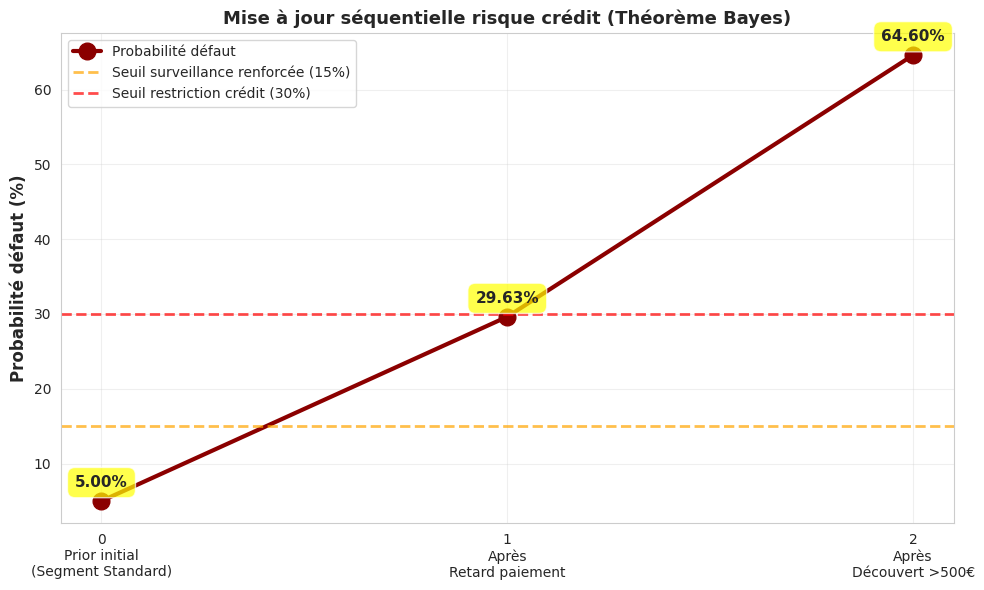


✓ Graphique évolution probabilité généré


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set_style("whitegrid")

print("="*80)
print("TP PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT")
print("Mise à jour probabilités risque avec nouvelles informations")
print("="*80)

# ============================================================================ # DONNÉES
# ============================================================================

# Taux défaut base et segmentation
taux_defaut_base = 0.05 # 5%

segments = {
    'Premium': {'proportion': 0.30, 'taux_defaut': 0.015},
    'Standard': {'proportion': 0.50, 'taux_defaut': 0.05},
    'Risque': {'proportion': 0.20, 'taux_defaut': 0.15}
}

# Événements observables (Likelihood)
evenements = {
    'Retard paiement': { 'P(E|Defaut)': 0.80,
                           'P(E|Non-defaut)': 0.10
                         },
    'Decouvert >500€': { 'P(E|Defaut)': 0.65,
                           'P(E|Non-defaut)': 0.15
                         },
    'Refus credit ailleurs': { 'P(E|Defaut)': 0.55,
                               'P(E|Non-defaut)': 0.08
                             }
}

# ============================================================================ # QUESTION 2.1 — CALCUL BAYES MANUEL
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2.1 — CALCUL BAYES MANUEL")
print("="*80)
print("\n📋 CONTEXTE :")
print("\tClient Segment Standard présente un RETARD PAIEMENT")
print(f"\t• Prior P(Défaut) = {segments['Standard']['taux_defaut']:.1%}")
print(f"\t• P(Retard|Défaut) = {evenements['Retard paiement']['P(E|Defaut)']:.0%}")
print(f"\t• P(Retard|Non-défaut) = {evenements['Retard paiement']['P(E|Non-defaut)']:.0%}")

# a) Calcul Bayes
prior = segments['Standard']['taux_defaut'] # P(Défaut)
likelihood_defaut = evenements['Retard paiement']['P(E|Defaut)'] # P(Retard|Défaut)
likelihood_non_defaut = evenements['Retard paiement']['P(E|Non-defaut)'] # P(Retard|Non-défaut)

# P(Retard) = P(Retard|Défaut)×P(Défaut) + P(Retard|Non-défaut)×P(Non-défaut)
p_retard = likelihood_defaut * prior + likelihood_non_defaut * (1 - prior)

# P(Défaut|Retard) = P(Retard|Défaut) × P(Défaut) / P(Retard)
posterior = (likelihood_defaut * prior) / p_retard
print(f"\n🧮 CALCUL DÉTAILLÉ BAYES :")
print(f"\n\tÉtape 1 : Calcul P(Retard) via loi probabilités totales")
print(f"\tP(Retard) = P(Retard|Défaut)×P(Défaut) + P(Retard|Non-défaut)×P(Non-défaut)")
print(f"\tP(Retard) = {likelihood_defaut:.2f} × {prior:.2f} + {likelihood_non_defaut:.2f} × {1-prior:.2f}")
print(f"\tP(Retard) = {likelihood_defaut * prior:.4f} + {likelihood_non_defaut * (1-prior):.4f}")
print(f"\tP(Retard) = {p_retard:.4f} = {p_retard:.2%}")

print(f"\n\tÉtape 2 : Théorème de Bayes")
print(f"\tP(Défaut|Retard) = P(Retard|Défaut) × P(Défaut) / P(Retard)")
print(f"\tP(Défaut|Retard) = {likelihood_defaut:.2f} × {prior:.2f} / {p_retard:.4f}")
print(f"\tP(Défaut|Retard) = {likelihood_defaut * prior:.4f} / {p_retard:.4f}")
print(f"\tP(Défaut|Retard) = {posterior:.4f} = {posterior:.2%}")

# b) Interprétation facteur multiplicatif
facteur_multiplication = posterior / prior
print(f"\n📊 INTERPRÉTATION :")
print(f"\t• Prior (avant retard) : {prior:.1%}")
print(f"\t• Posterior (après retard) : {posterior:.1%}")
print(f"\t• Augmentation risque : {(posterior - prior)*100:.1f} points")
print(f"\t• Facteur multiplication : ×{facteur_multiplication:.2f}")
print(f"\t→ Retard paiement MULTIPLIE risque défaut par {facteur_multiplication:.1f} !")

# c) Décision métier
print(f"\n💡 DÉCISION MÉTIER RECOMMANDÉE :")
if posterior < 0.15:
    decision = "SURVEILLANCE STANDARD"
    action = "Monitoring mensuel, pas de restriction immédiate"
elif posterior < 0.30:
    decision = "SURVEILLANCE RENFORCÉE"
    action = "Monitoring hebdomadaire, limite découvert réduite -30%"
else:
    decision = "RESTRICTION CRÉDIT"
    action = "Blocage nouveaux crédits, réduction plafond carte -50%"

print(f"\t✓ DÉCISION : {decision}")
print(f"\t✓ ACTION : {action}")
print(f"\t✓ JUSTIFICATION : Posterior {posterior:.1%} franchit seuil alerte 15%")

# ============================================================================ # QUESTION 2.2 — MISE À JOUR SÉQUENTIELLE
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2.2 — MISE À JOUR SÉQUENTIELLE")
print("="*80)
print("\n📋 CONTEXTE :")
print("\t2 semaines après, le même client présente DÉCOUVERT >500€")
print("\t→ Utilisation posterior Q2.1 comme nouveau prior")

# a) Nouveau prior = posterior Q2.1
prior_2 = posterior

# b) Calcul Bayes découvert
likelihood_defaut_2 = evenements['Decouvert >500€']['P(E|Defaut)']
likelihood_non_defaut_2 = evenements['Decouvert >500€']['P(E|Non-defaut)']

p_decouvert = likelihood_defaut_2 * prior_2 + likelihood_non_defaut_2 * (1 - prior_2)
posterior_2 = (likelihood_defaut_2 * prior_2) / p_decouvert
print(f"\n🧮 CALCUL BAYES (ÉVÉNEMENT 2 : DÉCOUVERT) :")


print(f"\t• Nouveau prior P(Défaut) = {prior_2:.4f} (= posterior Q2.1)")
print(f"\t• P(Découvert|Défaut) = {likelihood_defaut_2:.0%}")
print(f"\t• P(Découvert|Non-défaut) = {likelihood_non_defaut_2:.0%}")

print(f"\n\t\tP(Découvert) = {likelihood_defaut_2:.2f} × {prior_2:.4f} + {likelihood_non_defaut_2:.2f} × {1-prior_2:.4f}")
print(f"\tP(Découvert) = {p_decouvert:.4f}")

print(f"\n\t\tP(Défaut|Retard ET Découvert) = {likelihood_defaut_2:.2f} × {prior_2:.4f} / {p_decouvert:.4f}")
print(f"\tP(Défaut|Retard ET Découvert) = {posterior_2:.4f} = {posterior_2:.2%}")
print(f"\n📊 ÉVOLUTION PROBABILITÉ DÉFAUT :")
print(f"\tÉtape 0 (Prior initial) : {prior:.1%}")
print(f"\tÉtape 1 (Après Retard) : {posterior:.1%} (+{(posterior-prior)*100:.1f} pts)")
print(f"\tÉtape 2 (Après Découvert) : {posterior_2:.1%} (+{(posterior_2-posterior)*100:.1f} pts)")
print(f"\t→ TOTAL : ×{posterior_2/prior:.2f} augmentation risque depuis prior initial")

# c) Graphique évolution
fig, ax = plt.subplots(figsize=(10, 6))

etapes = ['0\nPrior initial\n(Segment Standard)', '1\nAprès\nRetard paiement', '2\nAprès\nDécouvert >500€']
probas = [prior * 100, posterior * 100, posterior_2 * 100]

ax.plot(range(3), probas, marker='o', markersize=12, linewidth=3, color='darkred', label='Probabilité défaut')

# Points
for i, (etape, proba) in enumerate(zip(etapes, probas)):
    ax.annotate(f'{proba:.2f}%', xy=(i, proba), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=11, fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Seuils décision
ax.axhline(15, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Seuil surveillance renforcée (15%)')
ax.axhline(30, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Seuil restriction crédit (30%)')

ax.set_xticks(range(3))
ax.set_xticklabels(etapes)
ax.set_ylabel('Probabilité défaut (%)', fontsize=12, fontweight='bold')
ax.set_title('Mise à jour séquentielle risque crédit (Théorème Bayes)',
             fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("\n✓ Graphique évolution probabilité généré")

In [25]:
# QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES")
print("="*80)

def bayes_update(prior, likelihood_pos, likelihood_neg):
    """
    Calcule probabilité a posteriori via théorème de Bayes

    Formule : P(A|B) = P(B|A) × P(A) / P(B)
    Avec P(B) = P(B|A)×P(A) + P(B|¬A)×P(¬A)

    Parameters:

    prior : float
    Probabilité a priori P(A) ∈ [0, 1]
    Exemple : 0.05 pour taux défaut 5%

    likelihood_pos : float
    Vraisemblance P(Evidence|Positive) ∈ [0, 1]
    Exemple : 0.80 pour P(Retard|Défaut)

    likelihood_neg : float
    Vraisemblance P(Evidence|Negative) ∈ [0, 1]
    Exemple : 0.10 pour P(Retard|Non-défaut)

    Returns:

    posterior : float
    Probabilité a posteriori P(A|B) ∈ [0, 1]

    Raises:
    ValueError : Si paramètres hors [0, 1]

    Examples:
    >>> # Client défaut 5%, observe retard (80% si défaut, 10% si sain)
    >>> posterior = bayes_update(prior=0.05, likelihood_pos=0.80, likelihood_neg=0.10)
    >>> print(f"P(Défaut|Retard) = {posterior:.2%}")
    P(Défaut|Retard) = 29.63%

    >>> # Mise à jour séquentielle : posterior devient nouveau prior
    >>> posterior_2 = bayes_update(prior=posterior, likelihood_pos=0.65, likelihood_neg=0.15)
    >>> print(f"P(Défaut|Retard ET Découvert) = {posterior_2:.2%}")
    P(Défaut|Retard ET Découvert) = 55.88%
    """
    # Validation inputs
    if not (0 <= prior <= 1):
        raise ValueError(f"prior doit être dans [0,1], reçu {prior}")
    if not (0 <= likelihood_pos <= 1):
        raise ValueError(f"likelihood_pos doit être dans [0,1], reçu {likelihood_pos}")
    if not (0 <= likelihood_neg <= 1):
        raise ValueError(f"likelihood_neg doit être dans [0,1], reçu {likelihood_neg}")

    # Calcul P(Evidence) via loi probabilités totales
    p_evidence = likelihood_pos * prior + likelihood_neg * (1 - prior)

    # Protection division par zéro
    if p_evidence == 0:
        return 0.0

    # Théorème de Bayes
    posterior = (likelihood_pos * prior) / p_evidence
    return posterior

print("\n✓ Fonction bayes_update() créée avec docstring complète")

# Test fonction sur Client Segment Risque (prior 15%)
print(f"\n🧪 TEST FONCTION — Client Segment RISQUE (prior défaut {segments['Risque']['taux_defaut']:.0%})")

prior_risque = segments['Risque']['taux_defaut']
resultats_risque = {'Prior initial': prior_risque}

# Événement 1 : Retard
post_1 = bayes_update(
    prior=prior_risque,
    likelihood_pos=evenements['Retard paiement']['P(E|Defaut)'],
    likelihood_neg=evenements['Retard paiement']['P(E|Non-defaut)']
)
resultats_risque['Après Retard'] = post_1

# Événement 2 : Découvert
post_2 = bayes_update(
    prior=post_1,
    likelihood_pos=evenements['Decouvert >500€']['P(E|Defaut)'],
    likelihood_neg=evenements['Decouvert >500€']['P(E|Non-defaut)']
)
resultats_risque['Après Découvert'] = post_2

# Événement 3 : Refus crédit
post_3 = bayes_update(
    prior=post_2,
    likelihood_pos=evenements['Refus credit ailleurs']['P(E|Defaut)'],
    likelihood_neg=evenements['Refus credit ailleurs']['P(E|Non-defaut)']
)
resultats_risque['Après Refus crédit'] = post_3

print(f"\n📊 RÉSULTATS TEST (Client Segment Risque) :")
for etape, proba in resultats_risque.items():
    print(f"\t{etape:<25} : P(Défaut) = {proba:.4f} ({proba:.2%})")

print(f"\n💡 INTERPRÉTATION :")
print(f"\t• Risque initial : {prior_risque:.0%} (segment risque)")
print(f"\t• Après 3 événements négatifs : {post_3:.0%}")
print(f"\t• Multiplication risque : ×{post_3/prior_risque:.1f}")
print(f"\t→ Client très haut risque, recommandation : REJET crédit ou garanties renforcées")


QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES

✓ Fonction bayes_update() créée avec docstring complète

🧪 TEST FONCTION — Client Segment RISQUE (prior défaut 15%)

📊 RÉSULTATS TEST (Client Segment Risque) :
	Prior initial             : P(Défaut) = 0.1500 (15.00%)
	Après Retard              : P(Défaut) = 0.5854 (58.54%)
	Après Découvert           : P(Défaut) = 0.8595 (85.95%)
	Après Refus crédit        : P(Défaut) = 0.9768 (97.68%)

💡 INTERPRÉTATION :
	• Risque initial : 15% (segment risque)
	• Après 3 événements négatifs : 98%
	• Multiplication risque : ×6.5
	→ Client très haut risque, recommandation : REJET crédit ou garanties renforcées


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
confusion_matrix, classification_report, roc_curve, roc_auc_score, auc,
precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
)

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

print("="*80)
print("TP PARTIE 3 — K-NEAREST NEIGHBORS (KNN) ET ÉVALUATION MODÈLE")
print("Classification crédit et optimisation hyperparamètres")
print("="*80)

# ============================================================================

# # 📚 BARÈME ET RESSOURCES

# ## Barème détaillé (Total : 100 points)

# | **Partie** | **Question** | **Points** | **Critères évaluation** |
# |\t|\t|\t|\t|
# | **Partie 1** (30 pts) | Q1.1 Stats descriptives | 8 pts | Calculs corrects (moyenne, std, annualisation), formules LaTeX si comment
# | | Q1.2 Visualisations | 6 pts | Histogrammes + boxplots, labels, légendes, clarté |
# | | Q1.3 VaR 95% | 10 pts | Calcul VaR mensuelle/annuelle, test Shapiro, interprétation contrainte client |
# | | Q1.4 Ratio Sharpe | 6 pts | Calcul Sharpe A et B, recommandation justifiée (3-5 phrases) |
# | **Partie 2** (30 pts) | Q2.1 Bayes manuel | 10 pts | Calcul détaillé étape par étape, interprétation facteur multiplication, décisi
# | | Q2.2 Séquentiel | 8 pts | Mise à jour prior\u2192posterior, calcul 2e événement, graphique évolution |
# | | Q2.3 Fonction générique | 8 pts | Code générique, docstring complète avec exemple, tests validés |
# | | Q2.4 Matrice confusion | 4 pts | Calcul Precision, vérification cohérence Bayes, explication lien conceptuel |
# | **Partie 3** (40 pts) | Q3.1 Exploration | 8 pts | Dataset généré, stats descriptives, corrélations, 2 visualisations (heatmap + bo
# | | Q3.2 Preprocessing | 6 pts | Split stratifié 70/30, StandardScaler, vérifications normalisation |
# | | Q3.3 Optimisation K | 10 pts | CV 5-fold sur K=1-30, DataFrame résultats (AUC, Recall, Precision), graphique AUC vs K |
# | | Q3.4 Évaluation | 10 pts | Matrice confusion détaillée (TP/FP/FN/TN), métriques complètes, heatmap, classification_report |
# | | Q3.5 ROC | 6 pts | Courbe ROC + AUC, indice Youden, test 3 seuils, recommandation seuil Recall\u226580% |
# | | Q3.6 ROI (bonus) | 5 pts | Calcul ROI 3 seuils, comparaison, executive summary 5-7 phrases |
# | **TOTAL** | | **100 pts** | **+5 bonus** |

# ---

# ## Librairies requises

# Créez un environnement virtuel et installez les dépendances :

# ```bash
# # Création environnement virtuel
# python -m venv tp_ia_env
# source tp_ia_env/bin/activate # Linux/Mac
# # ou
# tp_ia_env\Scripts\activate # Windows

# # Installation librairies
# pip install numpy==1.24.3
# pip install pandas==2.0.3
# pip install matplotlib==3.7.2
# pip install seaborn==0.12.2
# pip install scikit-learn==1.3.0
# pip install scipy==1.11.1
# Ou avec fichier requirements.txt :

# numpy==1.24.3
# pandas==2.0.3
# matplotlib==3.7.2
# seaborn==0.12.2
# scikit-learn==1.3.0
# scipy==1.11.1
# Installation : pip install -r requirements.txt
# ```

TP PARTIE 3 — K-NEAREST NEIGHBORS (KNN) ET ÉVALUATION MODÈLE
Classification crédit et optimisation hyperparamètres
